In [1]:
import os
import pickle
from ase.db import connect
from ase.visualize import view
import networkx as nx
from copy import deepcopy

from GAMERNet.rnet.networks.reaction_network import ReactionNetwork
from GAMERNet.rnet.networks.surface import Surface

with open('../scripts/c1pd111/rxn_net_bp.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)  # dict of elementary reactions

net = ReactionNetwork().from_dict(content)
print(net)

ReactionNetwork(43 adsorbed intermediates, 14 gas molecules, 105 elementary reactions)
Surface: Pd48(111)
Network Carbon cutoff: C1



In [9]:
a = net.search_reaction(inters='13111*')
for step in a:
    print(step, step.r_type)

6 elementary reactions found
[1]14111*(CH4O*)+[1]00000*(Pd48*)<->[1]13111*(CH3O*)+[1]01011*(H*) C-H
[1]00000*(Pd48*)+[1]13111*(CH3O*)<->[1]12111*(CH2O*)+[1]01011*(H*) C-H
[1]00000*(Pd48*)+[1]13111*(CH3O*)<->[1]01011*(H*)+[1]12112*(CH2O*) O-H
[1]00000*(Pd48*)+[1]13111*(CH3O*)<->[1]01111*(HO*)+[1]12011*(CH2*) C-OH
[1]00000*(Pd48*)+[1]14211*(CH4O2*)<->[1]01111*(HO*)+[1]13111*(CH3O*) C-OH
[1]00000*(Pd48*)+[1]13211*(CH3O2*)<->[1]00111*(O*)+[1]13111*(CH3O*) C-O


In [4]:
for i in net:
    print(i)

[1]14011*(CH4*)+[1]00000*(Pd48*)<->[1]01011*(H*)+[1]13011*(CH3*)
[1]00000*(Pd48*)+[1]13011*(CH3*)<->[1]01011*(H*)+[1]12011*(CH2*)
[1]00000*(Pd48*)+[1]12011*(CH2*)<->[1]01011*(H*)+[1]11011*(CH*)
[1]00000*(Pd48*)+[1]11011*(CH*)<->[1]01011*(H*)+[1]10011*(C*)
[1]14411*(CH4O4*)+[1]00000*(Pd48*)<->[1]01011*(H*)+[1]13411*(CH3O4*)
[1]00000*(Pd48*)+[1]13411*(CH3O4*)<->[1]01011*(H*)+[1]12411*(CH2O4*)
[1]00000*(Pd48*)+[1]12411*(CH2O4*)<->[1]11411*(CHO4*)+[1]01011*(H*)
[1]11411*(CHO4*)+[1]00000*(Pd48*)<->[1]01011*(H*)+[1]10411*(CO4*)
[1]00000*(Pd48*)+[1]14111*(CH4O*)<->[1]01011*(H*)+[1]13111*(CH3O*)
[1]00000*(Pd48*)+[1]14111*(CH4O*)<->[1]01011*(H*)+[1]13112*(CH3O*)
[1]00000*(Pd48*)+[1]13111*(CH3O*)<->[1]12111*(CH2O*)+[1]01011*(H*)
[1]00000*(Pd48*)+[1]13111*(CH3O*)<->[1]01011*(H*)+[1]12112*(CH2O*)
[1]00000*(Pd48*)+[1]13112*(CH3O*)<->[1]01011*(H*)+[1]12112*(CH2O*)
[1]12111*(CH2O*)+[1]00000*(Pd48*)<->[1]11111*(CHO*)+[1]01011*(H*)
[1]12111*(CH2O*)+[1]00000*(Pd48*)<->[1]01011*(H*)+[1]11112*(CHO*)
[1]00

In [3]:
print(net[104])

[1]00211g(O2(g))+[2]00000*(Pd48*)<->[2]00111*(O*)


In [4]:
step1 = net[0]
print(step1)
step2 = net[1]
print(step2)
step3 = net[2]
print(step3)
print("TOTAL STEP")
step = 0.1 * step1 + step2 + step3
# print(step3.reactants, step3.products, step3.stoic)
print(step)

[1]00000*(Pd48*)+[1]14011*(CH4*)<->[1]13011*(CH3*)+[1]01011*(H*)
[1]00000*(Pd48*)+[1]13011*(CH3*)<->[1]12011*(CH2*)+[1]01011*(H*)
[1]12011*(CH2*)+[1]00000*(Pd48*)<->[1]11011*(CH*)+[1]01011*(H*)
TOTAL STEP
[2.1]00000*(Pd48*)+[0.1]14011*(CH4*)+[0.9]13011*(CH3*)<->[1]11011*(CH*)+[2.1]01011*(H*)


In [5]:
step = net[104]
print(step)
inter = step.reactants[0]
print(inter)

[2]00000*(Pd48*)+[1]00211g(O2(g))<->[2]00111*(O*)


TypeError: 'frozenset' object is not subscriptable

In [14]:
step1 = net[-1]
print(step1, step1.r_type)
step1.reverse()
print(step1, step1.r_type)


[2]00111*(O*)<->[2]00000*(Pd48*)+[1]00211g(O2(g)) desorption
[2]00000*(Pd48*)+[1]00211g(O2(g))<->[2]00111*(O*) adsorption


In [8]:
net['14111g'].ads_configs

{'gas': {'ase': Atoms(symbols='COH4', pbc=False, conn_pairs=...),
  'energy': -29.04256769,
  'std': 0.0}}

In [9]:
net.visualize_intermediate('14111g')

In [14]:
net['48489*'].molecule

Atoms(symbols='C2OCOCO2H8', pbc=False, conn_pairs=...)

In [4]:
step = net[0]
print(step, step.stoic)
step *= 2
print(step, step.stoic)

00000*(Pd48*)+14011*(CH4*)<->13011*(CH3*)+01011*(H*) [[-1, -1], [1, 1]]
00000*(Pd48*)+14011*(CH4*)<->13011*(CH3*)+01011*(H*) [[-2, -2], [2, 2]]


In [7]:
step1 = net[1]
print(step1)
step2 = net[2]
print(step2)
step3 = step1 + step2
print(step3)
print(step3.stoic)

00000*(Pd48*)+13011*(CH3*)<->01011*(H*)+12011*(CH2*)
00000*(Pd48*)+12011*(CH2*)<->01011*(H*)+11011*(CH*)
00000*(Pd48*)+13011*(CH3*)+12011*(CH2*)<->11011*(CH*)+01011*(H*)+12011*(CH2*)
[[-1, -1, -1], [1, 1, 1]]


In [2]:
content

{'intermediates': [{'code': '00000*',
   'molecule': Atoms(symbols='Pd48', pbc=True, cell=[[9.64764436633926, 0.0, 0.0], [4.82382218316963, 8.35510510792762, 0.0], [0.0, 0.0, 20.0]], conn_pairs=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])),
   'graph': <networkx.classes.graph.Graph at 0x7fc7d291e380>,
   'ads_configs': {'surf': {'ase': Atoms(symbols='Pd48', pbc=True, cell=[[9.64764436633926, 0.0, 0.0], [4.82382218316963, 8.35510510792762, 0.0], [0.0, 0.0, 20.0]], conn_pairs=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])),
     'energy': 0.0,
     'std': 0.0}},
   'formula': 'Pd48',
   'electrons': 0,
   'is_surface': True,
   'phase': 'surf'},
  {'code': '14011*',
   'molecule': Atoms(symbols='CH4', pbc=False, conn_pairs=...),
   'graph': <networkx.classes.digraph.DiGraph at 0x7fc7d229f400>,
   'ads_configs': {'config_0': {'ase': Atoms(sy

In [13]:
rxn_net_copy = deepcopy(rxn_net)

In [14]:
rxn_net == rxn_net_copy

True

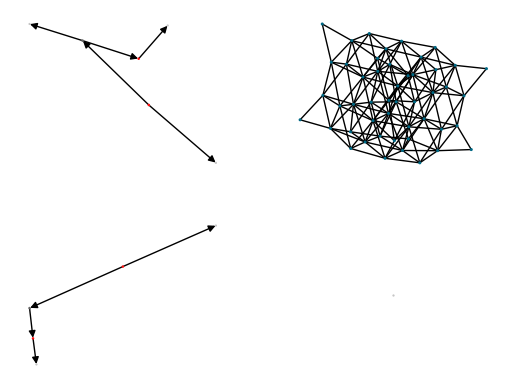

In [2]:
step = rxn_net[9]
step.draft()
# step.full_order()
# print(step)
# step.bb_order()
# print(step)

In [10]:
step.reactants

frozenset({00000*(Pd48*), 13212*(CH3O2*)})

In [20]:
rxn_net.search_connections()

AttributeError: 'Intermediate' object has no attribute 'reactions'

In [15]:
rxn_net_copy.del_intermediates(['14111*'])

Deleted 1 intermediates and 3 elementary reactions
Number of intermediates before: 58, after: 57
Number of reactions before: 105, after: 102


In [16]:
rxn_net == rxn_net_copy

False

In [4]:
rxn_net.search_reaction_by_inter(['13111*', '01011*'])

3 elementary reactions involving the intermediates ['13111*', '01011*']


[00000*(Pd48*)+14111*(CH4O*)<->13111*(CH3O*)+01011*(H*),
 13111*(CH3O*)+00000*(Pd48*)<->12111*(CH2O*)+01011*(H*),
 13111*(CH3O*)+00000*(Pd48*)<->01011*(H*)+12112*(CH2O*)]

# Try global reactions identifier

In [ ]:
ngr = rxn_net.get_num_global_reactions(['10211g', '02011g'], ['14111g', '10111g', '02111g'])

In [ ]:
ngr


# delete intermediates

In [ ]:
rxn_net.del_intermediates(["12411*"])
print(rxn_net)

In [ ]:
rxn_net.reactions[0]
rxn_net.search_reaction_by_code('14011*(CH4*)+00000*(Pd48*)<->13011*(CH3*)+01011*(H*)')

# Visualization

In [ ]:
rxn_net.visualize_intermediate('02011g')

In [ ]:
for rxn in rxn_net.reactions:
    rxn.calc_reaction_barrier(bep_params=[0.55, 0.8])    
rxn_net.visualize_reaction(2, show_uncertainty=True)

# Work with graph representation

In [ ]:
graph = rxn_net.gen_graph(show_steps=False, del_surf=True)
for node in graph.nodes:
    print(node, graph.nodes[node])

In [ ]:
rxn_net.write_dotgraph(".", "test_del.png", show_steps=False)

In [ ]:
rxn_net.write_dotgraph(".", 'HIGHLIGHT_test.png', del_surf=True,  show_steps=False, highlight=x)

# interactive plotly graph

In [ ]:
graph = rxn_net.gen_graph(del_surf=True, show_steps=False, highlight=x)

In [ ]:
import plotly.graph_objects as go

def gen_interactive_graph(graph: nx.DiGraph):
    pos = nx.kamada_kawai_layout(graph)
    nx.set_node_attributes(graph, pos, 'pos')
    edge_x = []
    edge_y = []
    G = graph
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    
    node_x = [pos[0] for pos in list(nx.get_node_attributes(G,'pos').values())]
    node_y = [pos[1] for pos in list(nx.get_node_attributes(G,'pos').values())]
    
    hover_texts = []
    for node in G.nodes(data=True):
        img_path = node[1]['fig_path']
        formula = node[1]['formula']
        hover_text = f"""<
                <TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0">
                <TR>
                <TD><IMG SRC="{img_path}"/></TD>
                </TR>
                <TR>
                <TD>{formula}</TD>
                </TR>
                </TABLE>>"""
        hover_texts.append(hover_text)
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        hovertext=hover_texts,
        marker=dict(
            showscale=True,
            size=30,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            )
        )
    )
    
    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(f"# of connections: {len(adjacencies[1])}")
    
    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text
    
    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0,l=0,r=0,t=0),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                    )
    fig.show()
    

In [ ]:
gen_interactive_graph(graph)

In [ ]:
import networkx as nx
from collections import deque

def constrained_shortest_path(graph, source, target, intermediates_to_avoid):
    visited = set()
    queue = deque([(source, [source])])  # Each element of the queue is a tuple (node, path_so_far)

    while queue:
        current_node, path_so_far = queue.popleft()

        if current_node == target:
            return path_so_far

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            # Skip nodes that are not elementary reactions
            if 'type' in graph.nodes[neighbor] and graph.nodes[neighbor]['type'] != 'elementary_reaction':
                continue

            # Skip intermediates to avoid
            if neighbor in intermediates_to_avoid:
                continue
            
            if neighbor not in visited:
                queue.append((neighbor, path_so_far + [neighbor]))
                visited.add(neighbor)
                
    return None  # return None if no such path exists


In [ ]:
import networkx as nx
from collections import deque

# Define your graph here
G = nx.Graph()
G.add_edges_from([
    ("A", "R1"),
    ("R1", "B"),
    ("B", "R2"),
    ("R2", "C"),
    ("B", "R3"),
    ("R3", "D"),
])

# Annotate nodes with their types
for node in ["A", "B", "C", "D"]:
    G.nodes[node]['type'] = 'intermediate'
for node in ["R1", "R2", "R3"]:
    G.nodes[node]['type'] = 'elementary_reaction'

def custom_shortest_path(rxn_net, graph, source, target):
    queue = deque([(source, [])])
    graph = graph.to_undirected()
    intermediates_visited = set()
    reactions_visited = set()
    while queue:
        current_node, path_so_far = queue.popleft()
        
        # Check if the target node is reached
        if current_node == target:
            return path_so_far

        intermediates_visited.add(current_node)

        for step in graph.neighbors(current_node):
            if step in reactions_visited:
                continue

            # Update the path based on the type of the neighbor
            inters = list(rxn_net.reactions[step].reactants) + list(rxn_net.reactions[step].products)
            unvisited_inters = [inter for inter in inters if inter not in intermediates_visited]
            if len(unvisited_inters) != 0:
                continue
            new_path = path_so_far + [step] if graph.nodes[step]['category'] not in ('ads', 'sur', 'gas') else path_so_far

            queue.append((step, new_path))
            visited.add(neighbor)

    return None  # Path not found

def custom_shortest_path(net, graph, source, target):
    visited = set()
    visited_inters = {'000000*', '010101*'}
    queue = deque([(source, [])])

    while queue:
        current_node, path_so_far = queue.popleft()
        
        # Check if the target node is reached
        if current_node == target:
            return path_so_far

        visited.add(current_node)
        if graph.nodes[current_node]['category'] in ('ads', 'sur', 'gas'):
            visited_inters.add(current_node)

        for neighbor in graph.neighbors(current_node):
            # Skip if already visited
            if neighbor in visited:
                continue

            if graph.nodes[neighbor]['category'] not in ('ads', 'sur', 'gas'):
                index = rxn_net.reactions[neighbor].index
                inters = list(net.reactions[index].reactants) + list(net.reactions[index].products)
                if not all([inter in visited_inters for inter in inters]):
                    continue

            # Update the path based on the type of the neighbor
            new_path = path_so_far + [neighbor] if graph.nodes[neighbor]['type'] == 'elementary_reaction' else path_so_far

            queue.append((neighbor, new_path))
            visited.add(neighbor)

    return None  # Path not found

def shortest_path_sm(graph, source, target):
    # select all nodes that are not intermediates
    visited_intermediates = set()
    rxn_nodes = [node for node in graph.nodes if graph.nodes[node]['category'] not in ('ads', 'sur', 'gas')]
    break_condition = lambda node: target in node
    cc_condition = lambda node: all([intermediate in visited_intermediates for intermediate in node])




In [ ]:
nx_graph = rxn_net.graph

In [ ]:
x = custom_shortest_path(rxn_net, nx_graph, '102101g', '141101g')
x

In [ ]:
rxn_net.reactions

# Other

In [ ]:
for inter in rxn_net.intermediates.values():
    if inter.closed_shell:
        print(inter.smiles)

In [ ]:
rxn_net.add_eley_rideal('101101g', '001101*', '102101*')
print(rxn_net)

In [ ]:
print(len(rxn_net.reactions))

In [ ]:
print(len(rxn_net.reactions))

In [ ]:
counter  =0 
for reaction in rxn_net.reactions:
    counter += 1
    print(counter, reaction.code, reaction.components, reaction.r_type)

In [ ]:
for reaction in rxn_net.reactions:
    print(reaction.components)
    for component in reaction.components:
        for inter in component:
            print(inter.code)

In [ ]:
print(len(rxn_net.intermediates))

In [ ]:
closed_shell_atoms = []
for inter in rxn_net.intermediates.values():
    if inter.closed_shell == True:
        closed_shell_atoms.append(inter.molecule)
print(len(closed_shell_atoms))

In [ ]:
closed_shell_atoms = []
for inter in rxn_net.intermediates.values():
    if inter.closed_shell == True:
        closed_shell_atoms.append(inter.molecule)
print(len(closed_shell_atoms))

In [ ]:
closed_shell_atoms[0].get_chemical_symbols().count("H")

In [ ]:
view(closed_shell_atoms)

In [ ]:
y = rxn_net.gen_graph()
# y.remove_node("")
for node in y.nodes(data=True):
    print(node)
print(y)

In [ ]:
rxn_net.surface.facet

In [ ]:
rxn_net.write_dotgraph(".", 'OLIV_test.png', del_surf=True)

Look for intermediates with specified composition

In [ ]:
rxn_net.search_inter_by_elements({'C':1, 'H':2, 'O':2})

Look for all elementary steps involving a specific intermediate

In [ ]:
rxn_net.search_ts(["222101"])

In [ ]:
types = []
for reaction in rxn_net.reactions:
    types.append(reaction.r_type)
print(set(types))

In [ ]:
types = []
for inter in rxn_net.intermediates.values():
    types.append(inter.phase)
print(set(types))

# Try PyEnergyDiagrams>

In [ ]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()
diagram.add_level(0,'Separated Reactants')
diagram.add_level(-5.4,'mlC1')
diagram.add_level(-15.6,'mlC2','last',) #Using 'last'  or 'l' it will be together with the previous level
diagram.add_level(28.5,'mTS1',color='g')
diagram.add_level(-9.7,'mCARB1')
diagram.add_level(-19.8,'mCARB2','l')
diagram.add_level(20,'mCARBX','last')

In [ ]:
def visualize_step(step):
    import re
    rxn = step.__repr__()
    components = rxn.split("<->")
    reactants = components[0].split("+")
    products = components[1].split("+")
    # keep only chars between parentheses
    reactants = [re.findall(r'\((.*?)\)', reactant) for reactant in reactants]
    products = [re.findall(r'\((.*?)\)', product) for product in products]
    # flatten list of lists
    reactants = [item for sublist in reactants for item in sublist]
    products = [item for sublist in products for item in sublist]
    rxn_string = " + ".join(reactants) + " -> " + " + ".join(products)
    diagram = ED()
    diagram.add_level(0, rxn_string.split(" -> ")[0])
    diagram.add_level(round(step.e_act[0], 2), 'TS', color='r')
    diagram.add_level(round(step.energy[0], 2), rxn_string.split(" -> ")[1])
    diagram.add_link(0,1)
    diagram.add_link(1,2)
    y = diagram.plot(ylabel="Energy / eV") # this is the default ylabel
    # add title in Arial and bold, shifted slightly above
    # the default position
    plt.title(rxn_string, fontname='Arial', fontweight='bold',
              y=1.05) 
    # from os import makedirs
    # from ase.io import write
    # from os.path import abspath
    # from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    # makedirs('tmp', exist_ok=True)
    # for inter in step.reactants:        
    #     fig_path = abspath("tmp/{}.png".format(inter.code))
    #     write(fig_path, inter.molecule, show_unit_cell=0)
    #     arr_img = plt.imread(fig_path)
    #     im = OffsetImage(arr_img)
    #     ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction')
    #     diagram.ax.add_artist(ab)
    # diagram.plot(ylabel="eV")
    return diagram
        
    

In [ ]:
y = rxn_net.visualize_reaction(10)

In [ ]:
y.fig.get_default_bbox_extra_artists()

In [ ]:
artists = y.fig.get_default_bbox_extra_artists()
type(artists[1])
# add rectangle to the y axis
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import numpy as np

# create a list of Rectangle patches
rectangles = []
for i in range(10):
    rectangles.append(Rectangle((0, i), 1, 1))



In [ ]:
artists = y.fig.get_default_bbox_extra_artists()
rect_width = artists[2].get_position()[0] - artists[3].get_position()[0]
std = 0.3
rect_height = 1.96*2*std
anchor_point1 = (min(artists[2].get_position()[0], artists[3].get_position()[0]), )
anchor_point2 = (min(artists[2].get_position()[0], artists[3].get_position()[0]), )
anchor_point3 = (min(artists[2].get_position()[0], artists[3].get_position()[0]), )